## Simpe Linear Regression (การวิเคราะห์การถดถอยเชิงเส้น)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from tqdm import tnrange, tqdm_notebook
from IPython.display import HTML, display

ใน workshop นี้เราจะใช้ linear regression ในการทำนายพฤติกรรมของข้อมูล

เริ่มต้นเราจะสร้างข้อมูลแบบสุ่มจากสมการเส้นตรง y = mx + c ดังตัวอย่างด้านล่าง


In [15]:
# กำหนดค่าเริ่มต้นให้ m=7 และ c=-10
m = 7
c = -10

# สร้าง list ว่างของ X_list เพื่อเก็บค่า x และ Y_list เพื่อเก็บค่า y
X_list = []
Y_list = []

# P_tuple สำหรับเก็บคุ๋อันดับ x และ y
P_tuple = []

# ต้องการสร้างคู่อันดับจำนวน 100 คู่
for i in range(0, 100):
  
  # สุ่มค่า x ในช่วง -5 ถึง 5
  x = random.uniform(-5,5)
  X_list.append(x)
  
  # คำนวนค่า y จากค่า x โดยเพิ่มค่า noise เข้าไปเพื่อให้ข้อมูลมี variance มากขึ้น
  # ปกติสมการเส้นตรงคือ y = (m*x) + c แต่กเราเพิ่มค่า random (rd) เข้าไปเพื่อให้ข้อมูลมีความไม่แน่นอนปนอยู่ด้วย
  rd = random.random()* 10 * random.uniform(-2, 2)
  y = (m*x) + c + rd
  Y_list.append(y)
  
  P_tuple.append((x,y))
  
  print("Generate x="+str(x)+ ", y="+str(y) +", noise="+str(rd))

Generate x=4.988020769212568, y=30.649895288680675, noise=5.733749904192701
Generate x=1.943267650373274, y=5.030238253335884, noise=1.427364700722966
Generate x=-3.770754207245437, y=-33.166490389032944, noise=3.228789061685111
Generate x=1.365408554288793, y=-7.894844426723411, noise=-7.4527043067449625
Generate x=0.3675831536860148, y=-8.730628090386613, noise=-1.3037101661887158
Generate x=-1.660101692308257, y=-26.734027076753026, noise=-5.1133152305952265
Generate x=-0.5483295049049417, y=-5.0873531602980915, noise=8.7509533740365
Generate x=-0.06313619920234359, y=-11.989052405838374, noise=-1.5470990114219683
Generate x=2.15404137171514, y=4.571682289128099, noise=-0.5066073128778802
Generate x=-4.185897010597527, y=-37.32735128520248, noise=1.973927788980206
Generate x=3.4236903888155066, y=20.979209949308345, noise=7.0133772275998
Generate x=3.350291551351315, y=32.5234795372935, noise=19.071438677834294
Generate x=-4.183820891248572, y=-37.08482843244869, noise=2.20191780629

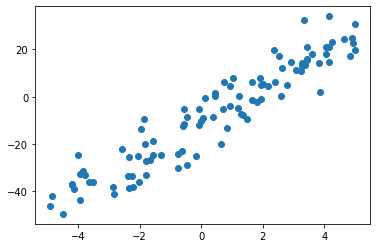

In [16]:
# ลอง plot ข้อมูลเพื่อดูการกระจายตัวของข้อมูล x และ y

# ถ้าต้องการวาดเส้นด้วยต้องกำหนดค่า line=True
def plot_graph(X_list,Y_list,m,c,linspace=[-5,5],n_data=100,line=False): 
  plt.scatter(X_list, Y_list)
  x = np.linspace(linspace[0],linspace[1],n_data)
  y = m*x+c
  if line: plt.plot(x, y, '-r')
  plt.show()
  
plot_graph(X_list,Y_list,m,c)

จะเห็นได้ว่าข้อมูลมีลักษณะของการกระจายตัวที่มีรูปแบบเป็นเส้นตรง ซึ่งเราแอบรู้แล้วว่ามันสร้างมาจาก สมการ y = 7x + -10 (จากที่เรากำหนด m=7 และ c=-10) ไว้


แต่ในครั้งนี้เราจะสอนให้คอมพิวเตอร์(โมเดล) เรียนรู้ที่จะสร้างสมการเส้นตรงขึ้นมาเองจากข้อมูลคู่อันดับที่เราสร้างขึ้นมา กล่าวคือการที่โมเดลจะสร้างสมการเส้นตรงขึ้นมาได้นั้น 


เราจะต้องรู้ค่า m และ c โดยที่โมเดลจะต้องประมาณค่า m และ c ที่ทำให้การวางตัวของจุดต่างๆเป็นไปในแนวเดียวกันกับเส้นตรงนั้นมากที่สุด

### สร้าง Hypothesis Function

1. กำหนด Hypothesis Function หรือโมเดลของเราขึ้นมาดังนี้

> h($\Theta$) = $\Theta_{1}$x + $\Theta_{0}$

ซึ่งจริงๆแล้ว h($\Theta$) ก็คือค่า y 

$\Theta_{1}$ คือค่า m 

$\Theta_{0}$ คือค่า c นั่นเอง

มันก็คือสมการเส้นตรงนั่นเองเพียงแต่เขียนให้ดูน่ากลัวเท่านั้นเอง 5555

In [17]:
# TODO:1-1 จงสร้างฟังก์ชันที่คืนค่า y ของ hypothesis function

def hypothesis(theta0, theta1, x):
  ### CODE HERE ############
  
	return theta1*x + theta0

  ##########################

In [18]:
### Test code for TODO:1 ###

test1 = hypothesis(4.7268, -3.6136, 8.3689)
print(test1)

#####################################
### ผลลัพธ์ที่ได้ควรจะเป็น -25.51505704 ###
#####################################

-25.51505704


2. ในขั้นนี้เราจะกำหนดค่าเริ่มต้นให้กับ $\Theta_{1}$ (ค่า m) และ $\Theta_{0}$ (ค่า c) แบบสุ่มให้กับ hypothesis function ของเราเพื่อให้โมเดลมีจุดเริ่มต้นที่จะเรียนรู้

Theta 0 is : 0.8477799681460313
Theta 1 is : 0.954261781644242


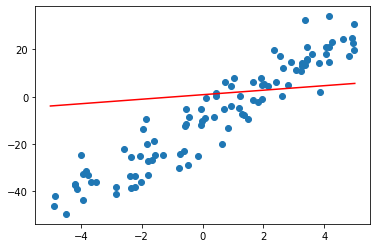

In [19]:
# TODO:1-2 กำหนดค่าเริ่มต้นให้กับ theta0 และ theta1 แบบสุ่ม (random แบบใดก็ได้)

### CODE HERE #######################

theta0 = random.random()
theta1 = random.random()

#####################################

print("Theta 0 is :",theta0)
print("Theta 1 is :",theta1)

plot_graph(X_list,Y_list,theta1,theta0,line=True)

#################################################
### ผลลัพธ์ที่ได้อาจแตกต่างกันเนื่องจากผลจากการ random ###
### แต่ต้องได้กราฟที่มัลักษณะคล้ายกับรูปด้านล่าง ############         
#################################################

ตัวอย่างผลลัพธ์จากการ plot (จะได้ออกมาหน้าตาคล้ายๆกัน อาจจะไม่เหมือนเป๊ะเพราะเป็นค่าที่ได้จากการ random)

<img src='https://github.com/Mixelon-tera/Workshop6_LinearRegression/raw/master/graph_ws6.png' width=400 />

จะเห็นว่าเมื่อค่า theta0 และ theta1 ที่ได้จากการสุ่มทำให้โมเดลสร้างสมการเส้นตรงแบบมั่วๆออกมาได้

### สร้าง Loss Function

การทำให้โมเดลสามารถเรียนรู้ที่จะแก้ไขค่า $\Theta_{1}$ และ $\Theta_{0}$ เพื่อปรับปรุงให้เส้นตรงมีทิศทางไปในแนวเดียวกันกับข้อมูล จึงมีความจำเป็นที่จะต้องกำหนด loss function หรือ cost function ขึ้นมา ซึ่งค่าที่ได้จากการคำนวน loss function จะเป็นตัวบ่งชี้ว่าสมการเส้นตรงที่โมเดลสร้างขึ้นมานั้นดีหรือห่วยมากน้อยเพียงใด โดยถ้าหากว่าเส้นตรงที่สร้างขึ้นมานั้นมีระยะห่างจากคู่จุดใดๆอยู่มากแสดงว่าไม่ดี ค่า loss ก็จะสูงในทางตรงกันข้ามหากมีระยะห่างน้อยแสดงว่าดี ค่า loss ก็จะมีค่าต่ำ

สำหรับ linear regression นั้น loss function ที่มักนิยมใช้คือ MSE (Mean square error) ซึ่งมีสมการดังนี้

> MSE = $\frac{1}{n}\sum_{t=1}^{n}(y - \tilde{y})^2$

ซึ่ง y คือค่าจริง, $\tilde{y}$ คือ ค่าที่ได้จากการทำนาย, และ n คือจำนวนข้อมูลทั้งหมด

ในขั้นตอนที่ 2 เราได้ plot ข้อมูล x,y และ สมการ x,y ที่ได้จากการสุ่มค่า $\Theta_{1}$ และ $\Theta_{0}$ เราสามารถคำนวน error จากสมการข้างต้นได้ดังนี้

In [20]:
# TODO:2-1 สร้าง loss function

def cal_MSE(y, y_pred):
  
  ### CODE HERE ##############
  
  mse = 0
  for i in range(len(y)):
    mse += (y[i] - y_pred[i])**2
    
    
  
  return (mse * 1.0) / len(y)

  ############################

In [21]:
### Test code for TODO:2-1 ###

y3 = [1.50, -2.73, 8.62, -12.14, 4.78]
y3_pred = [1.73, 1.68, -3.57, -10.92, 3.68]

td3 = cal_MSE(y3,y3_pred)
print(td3)

#####################################
### ผลลัพธ์ที่ได้ควรจะเป็น 34.1591 #######
#####################################

34.1591


คำนวนค่า error เฉลี่ยจาก loss function ดังกล่าวจากข้อมูล X_list และ Y_list ที่เราสร้างขึ้นมาก่อนหน้านี้

In [22]:
# TODO:2-2 คำนวนค่า loss ของข้อมูลทั้งหมดใน X_list และ Y_list

total_loss = 0 

### CODE HERE #######################################

for x,y in zip(X_list,Y_list):
  # คำนวนค่า loss
  loss = (y - hypothesis(theta0=theta0, theta1=theta1, x=x))**2
  # นำค่า loss รวมกับ total_loss ของเดิม
  total_loss += loss
  
  print("x=",x,"y=",y,"loss=",loss)
  
#####################################################
  
print("\nAverage loss =", total_loss/len(X_list))

x= 4.988020769212568 y= 30.649895288680675 loss= 627.1136707475782
x= 1.943267650373274 y= 5.030238253335884 loss= 5.4199203310660815
x= -3.770754207245437 y= -33.166490389032944 loss= 925.1320662168098
x= 1.365408554288793 y= -7.894844426723411 loss= 100.91370957290948
x= 0.3675831536860148 y= -8.730628090386613 loss= 98.58858794219088
x= -1.660101692308257 y= -26.734027076753026 loss= 675.8770487980049
x= -0.5483295049049417 y= -5.0873531602980915 loss= 29.28848018353592
x= -0.06313619920234359 y= -11.989052405838374 loss= 163.24109646158666
x= 2.15404137171514 y= 4.571682289128099 loss= 2.7835017141442298
x= -4.185897010597527 y= -37.32735128520248 loss= 1168.3195493409066
x= 3.4236903888155066 y= 20.979209949308345 loss= 284.4057306019364
x= 3.350291551351315 y= 32.5234795372935 loss= 811.0331859689773
x= -4.183820891248572 y= -37.08482843244869 loss= 1151.9336478117102
x= 1.9547380404408976 y= -1.1313454233294253 loss= 14.77985113644618
x= 3.2603413533697996 y= 12.868151606739769 

### การคำนวน Derivatives

ค่า loss ที่ได้จาก loss function เป็นค่าที่บอกถึงความผิดพลาดของโมเดลในการประมาณค่าของเส้นตรง เราจะนำค่า loss นี้มาบอกค่าความผิดพลาดของโมเดลปัจจุบัน และควรปรับโมเดลไปในทิศทางใด ซึงสิ่งที่โมเดลจะต้องปรับเราจะเรียกว่า weight ซึ่งในที่นี้คือค่า $\theta_{0}$ และ $\theta_{1}$ ที่ปรากฏอยู่ใน hypothesis function

ในขั้นตอนของการปรับ weight โมเดลจะนำค่า loss มาคำนวนสิ่งที่เรียกว่า gradient ซึ่งเป็นค่าที่ได้จากการคำนวนหาอนุพันธ์จากค่า loss มาปรับค่า $\theta_{0}$ และ $\theta_{1}$

<img src='https://miro.medium.com/max/1400/1*91DQMNKmNIdncqx6FsB4Iw.png'  width='500px'/>

เป้าหมายของเราคือ จะต้องใช้ gradient ปรับ weight เพื่อให้ค่า loss ของ model มีค่าต่ำที่สุดเท่าที่จะเป็นไปได้

In [23]:
# TODO:3 คำนวนค่า derivatives ของ hypothesis function เทียบกับ theta0 และ theta1
# ดังนัั้นฟังก์ชันนี้จะคืนค่า 2 ค่านั่นคือค่าที่ได้จากการดิฟด้วย theta0 คือ dtheta0 และ theta1 คือ dtheta1
# กำหนดให้ theta1 คือค่า m และ theta0 คือค่า c ในสมการเส้นตรง

def derivatives(theta0, theta1, X_list, Y_list):
	dtheta0 = 0
	dtheta1 = 0
  
  ### CODE HERE #########################################
  
	for (xi, yi) in zip(X_list, Y_list):
		dtheta0 += hypothesis(theta0, theta1, xi) - yi
		dtheta1 += (hypothesis(theta0, theta1, xi) - yi) * xi

	dtheta0 /= len(X_list)
	dtheta1 /= len(X_list)

  #######################################################
  
	return dtheta0, dtheta1

In [24]:
### Test code for TODO:3 ###

dt30 , dt31 = derivatives(3.24, 5.66, [1.45, -2.45, 5.38, -5.49], [10.46, -4.25, -5.83, 13.87])

print(dt30, dt31)

######################################################
### ผลลัพธ์ที่ได้ควรจะเป็น -1.89315 และ 114.6570925 #######
######################################################

-1.8931500000000003 114.6570925


หลังจากเราคำนวน gradient ของ theta1 และ theta0 ได้แล้วขั้นตอนต่อไปคือการปรับค่า theta1 และ theta0 ใน hypothesis function (ปรับ weight) เพื่อให้เส้นตรงของเราค่อยๆปรับไปตามข้อมูล

In [25]:
# TODO:4 สร้างฟังก์ชันสำหรับปรับ weight (ค่า theta1 และ theta0) 

def updateParameters(theta0, theta1, X_list, Y_list, alpha):
  
  ### CODE HERE ################################################
  
  # Step1: คำนวนค่า derivartive ของ theta1 และ theta0 
	dtheta0, dtheta1 = derivatives(theta0, theta1, X_list, Y_list)
 
  # Step2: ปรับค่า theta1 และ theta0 ไปตามค่า alpha และค่า gradient 
	theta0 = theta0 - alpha*(dtheta0)
	theta1 = theta1 - alpha*(dtheta1)
  
  ##############################################################
  
	return theta0, theta1

In [26]:
### Test code for TODO:4 ###

tt40, tt41 = updateParameters(3.24, 5.66, [1.45, -2.45, 5.38, -5.49], [10.46, -4.25, -5.83, 13.87], 0.1)

print(tt40,tt41)

######################################################################
### ผลลัพธ์ที่ได้ควรจะเป็น 3.4293150000000003 และ -5.805709250000001     ###
######################################################################

3.4293150000000003 -5.805709250000001


In [27]:
# TODO:5 สร้างฟังก์ชัน LinearRegression โดยรับค่า X_list และ Y_list 
# โดยคำนวนหาค่า theta1 และ theta0 ที่ทำให้เส้นตรงวางตัวไปในแนวเดียวกันกับข้อมูล 
# กล่าวคือปรับจนกว่าจะได้ค่า loss ต่ำสุดเท่าที่เป็นไปได้ => กำหนดให้มีการปรับ weight จำนวน epoch ครั้ง
# จากนั้นพล๊อตกราฟแสดงข้อมูลและเส้นตรง (เรียกฟังก์ชัน plot_graph) ในทุกๆ step ของการปรับ weight

def LinearRegression(X_list, Y_list, epoch, linspace=[-5,5], n_data=100,alpha=0.0002):
  ### CODE HERE #############################################################
  
  # Step1: กำหนดค่าเริ่มต้นให้กับ theta1 และ theta0 แบบสุ่ม (ใช้ฟังก์ชัน random)
	theta0 = random.random()
	theta1 = random.random()
  
  # Step2: วนลูปเพื่อใช้ในการปรับ weight ให้กับ model
	for i in range(0, epoch):
    # Step3: ในทุกๆ 100 step ให้ plot graph เพื่อแสดงข้อมูลและเส้นตรงปัจจุบัน 
		if i % 100 == 0:
			plot_graph(X_list,Y_list,theta1,theta0,linspace=linspace, n_data=n_data, line=True)
    # Step4: ปรับ weight ให้กับค่า theta1 และ theta0  
		theta0, theta1 = updateParameters(theta0, theta1, X_list, Y_list, alpha)
  
	return theta1,theta0

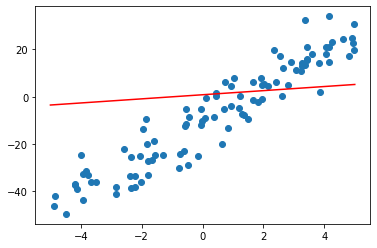

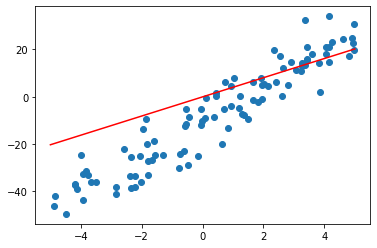

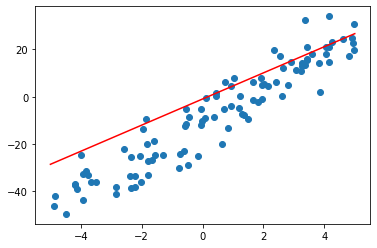

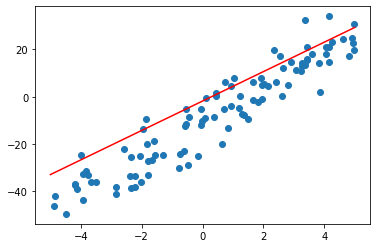

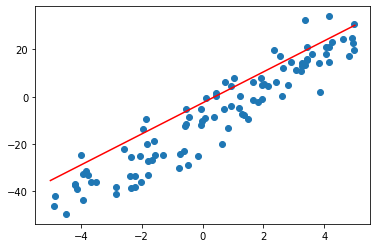

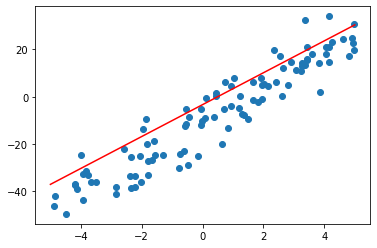

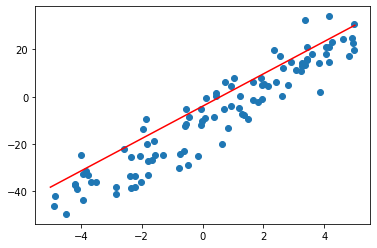

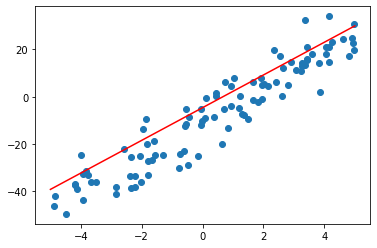

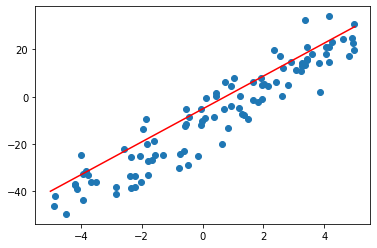

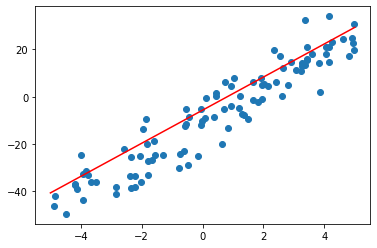

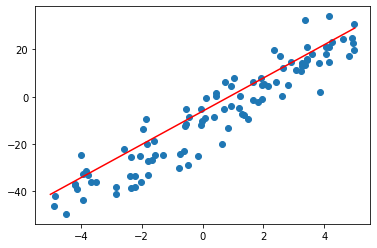

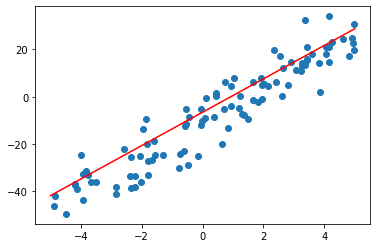

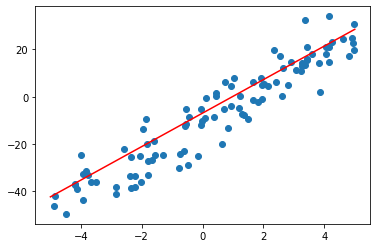

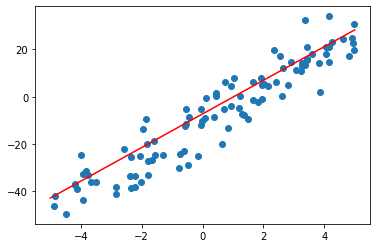

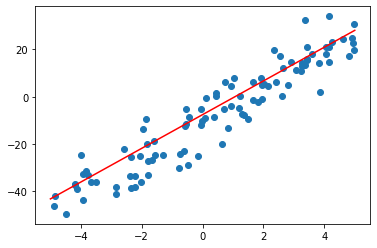

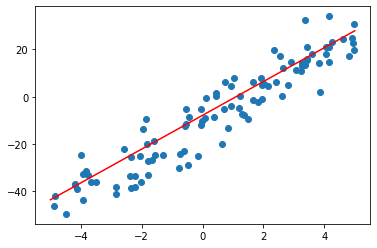

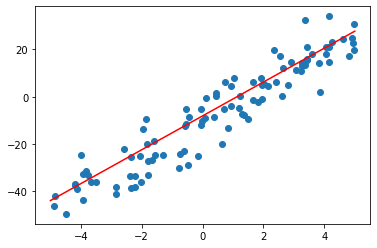

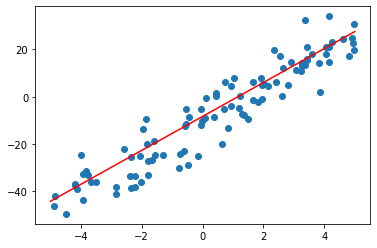

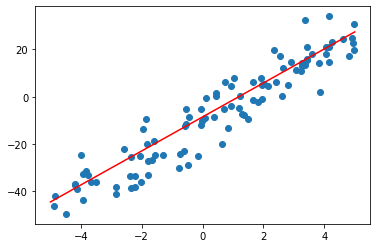

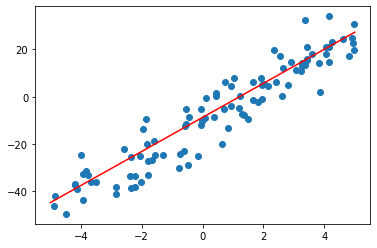

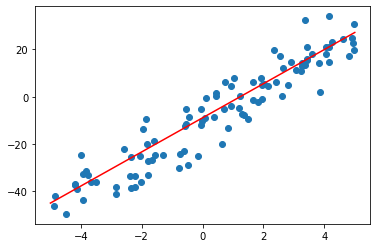

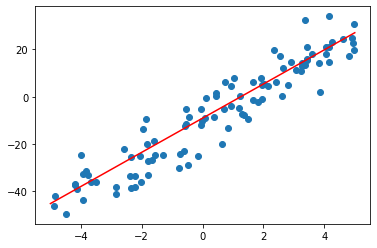

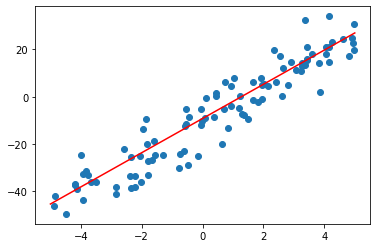

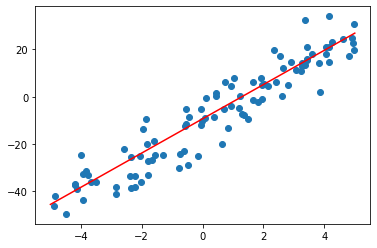

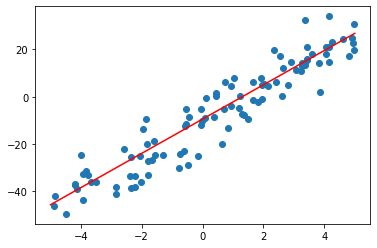

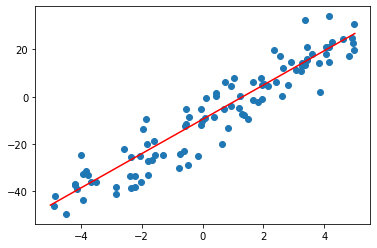

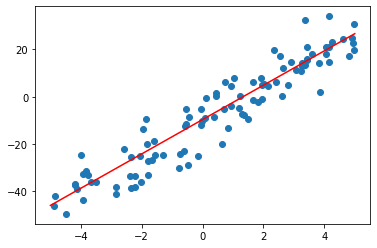

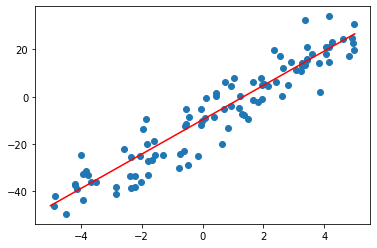

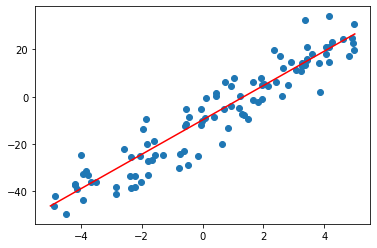

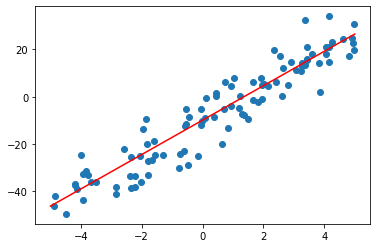

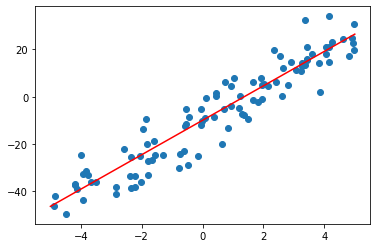

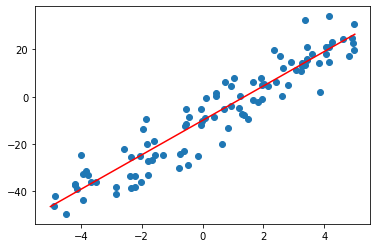

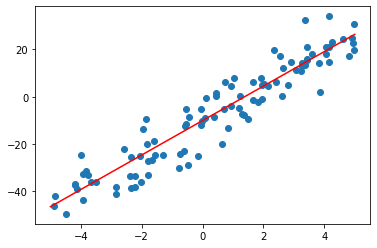

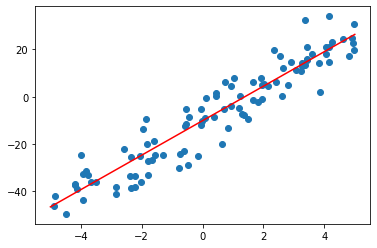

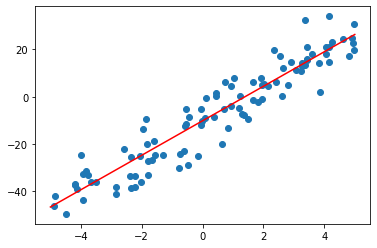

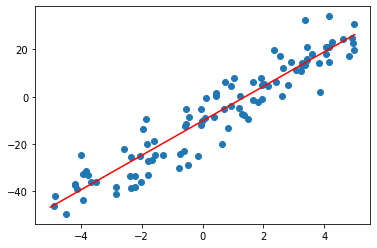

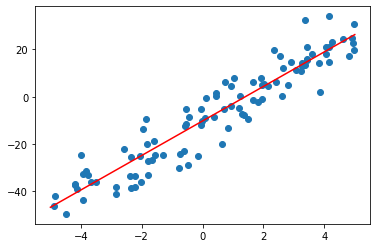

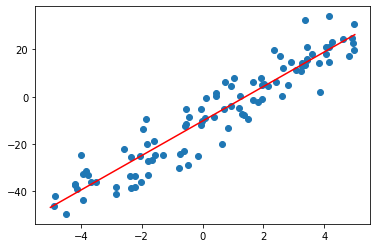

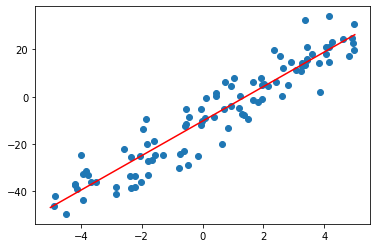

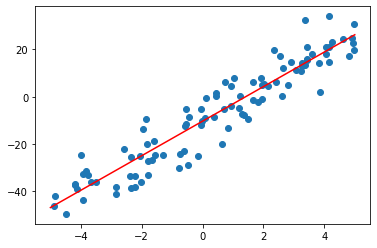

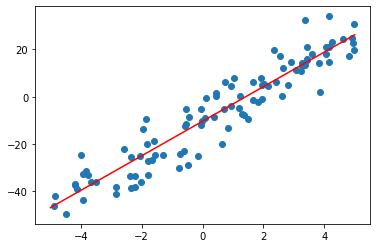

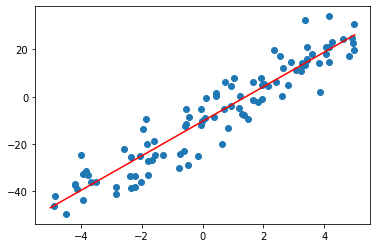

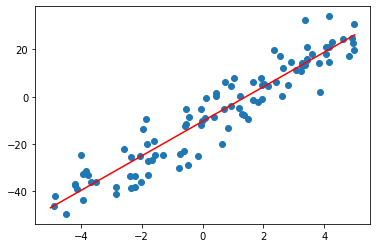

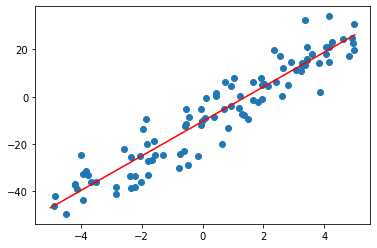

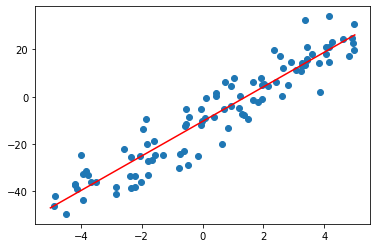

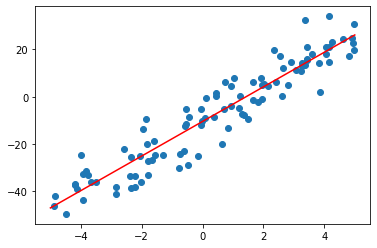

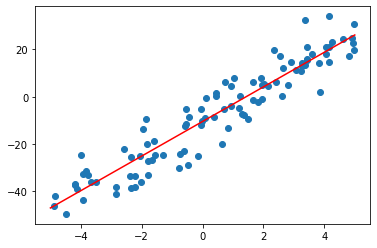

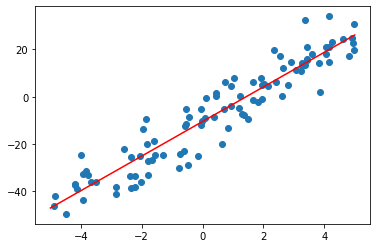

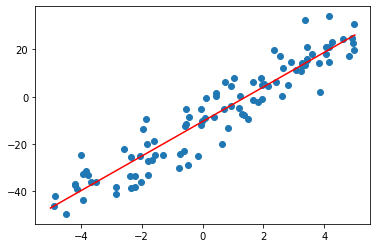

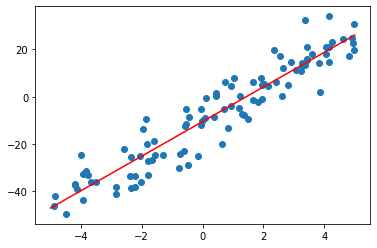

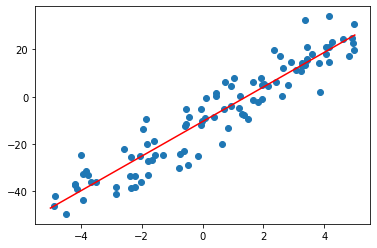

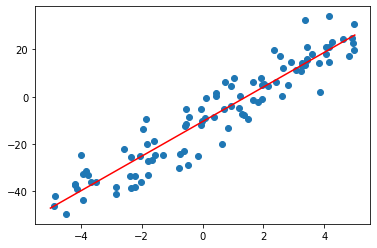

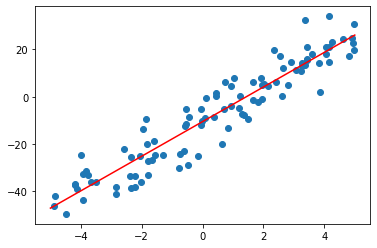

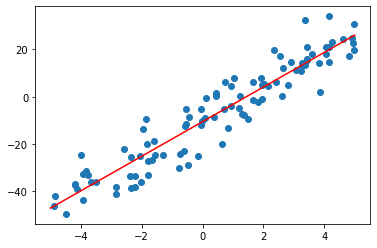

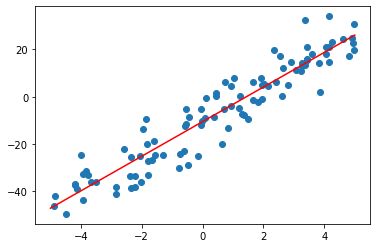

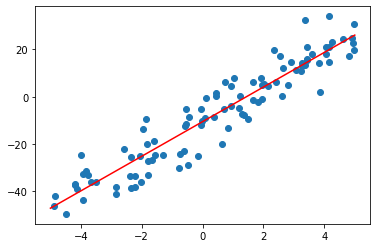

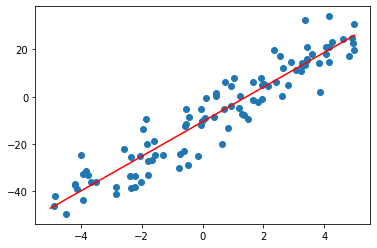

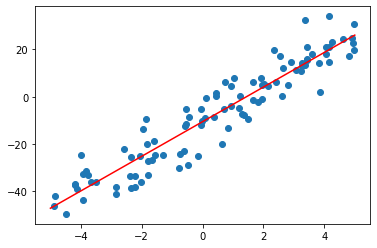

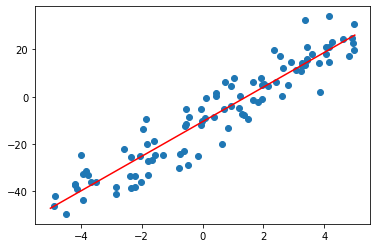

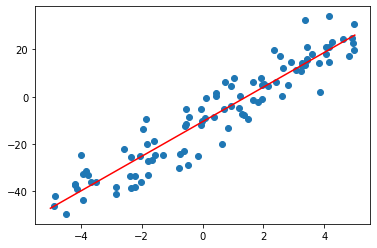

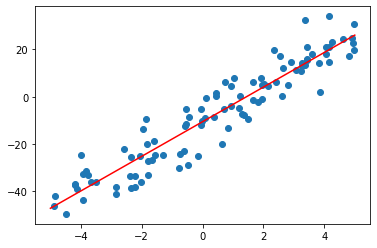

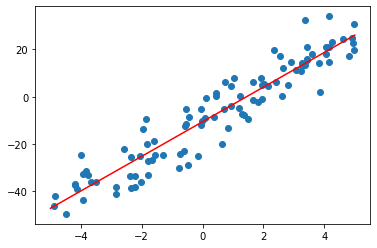

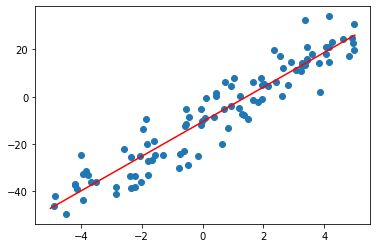

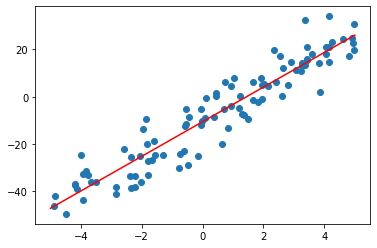

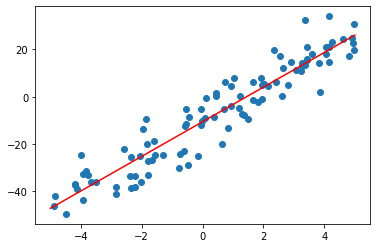

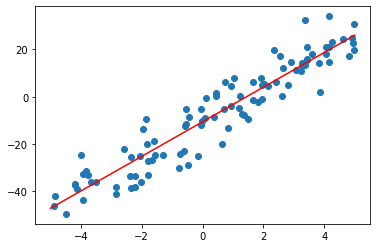

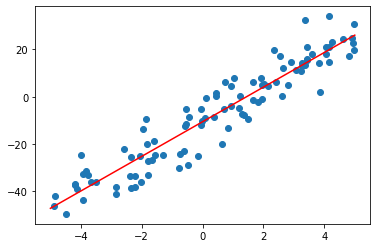

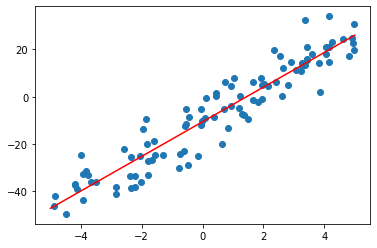

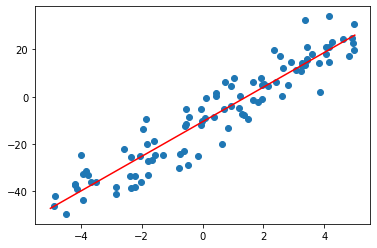

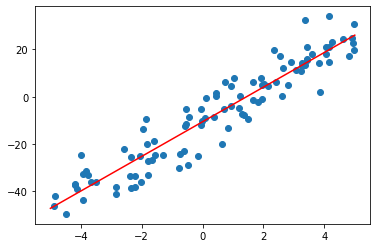

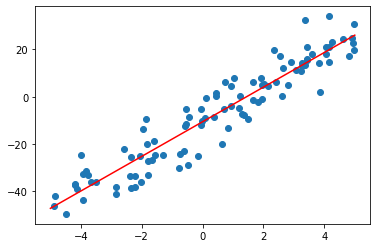

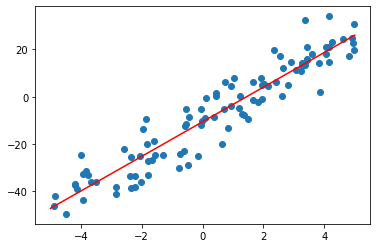

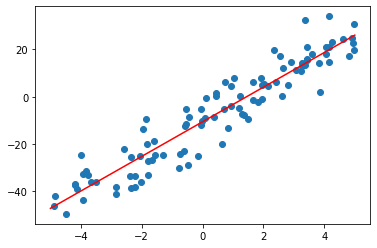

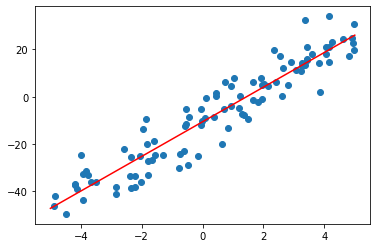

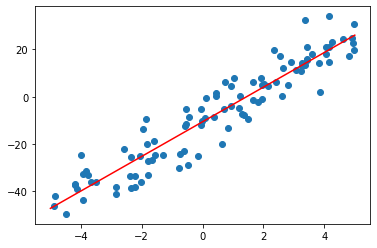

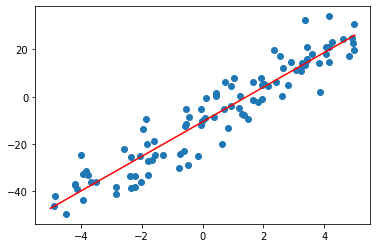

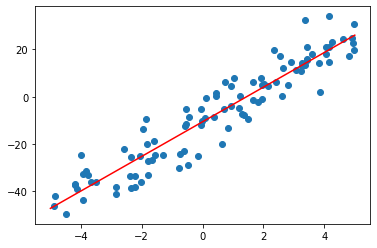

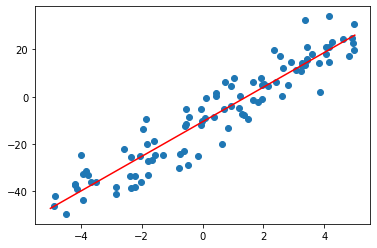

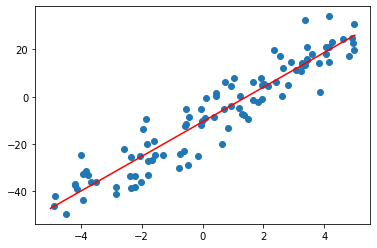

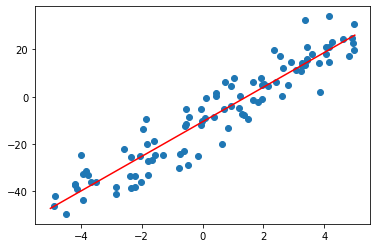

In [28]:
### Test code for TODO:5 ###
### ไปเรียก TA มาตรวจ #######

new_m, new_c = LinearRegression(X_list, Y_list, epoch=8000, alpha=0.001)

ทดลอง print ค่า theta1 และ theta0 ออกมาดูสิจะเห็นได้ว่าค่าที่ได้มีค่าเข้าใกล้ค่าที่เรากำหนดไว้ตอนต้น


In [29]:
print(new_m, new_c)

7.3203360145888325 -10.587101864807668


### ทดลองทำนายผลกันเถอะ

หลังจากที่เราสร้างเส้นตรงที่เข้ากับข้อมูลที่เราสร้างขึ้นมาได้แล้ว ในหัวข้อนี้เราจะใช้สมการเส้นตรงมาในการทำนายผลลัพธ์ 

โดยสุ่มหยิบข้อมูลจาก X_list เพื่อมาทำนายผลว่าตรงหรือแตกต่างจากผลลัพธ์ใน Y_list มากน้อยเพียงใด

In [30]:
# สุ่มหยิบข้อมูลจาก X_list

index = random.randint(0,len(X_list)-1)
x_rand = X_list[index]

# ใช้สมการเส้นตรงที่เราสร้างขึ้นมาทำนายผลค่า Y

pred = hypothesis(new_c, new_m, x_rand)

print("x_rand :",x_rand,"pred :",pred," Y_real :", Y_list[index])

x_rand : -0.4635609276293895 pred : -13.980523618289295  Y_real : -29.00546004364768


### ทำนายข้อมูลเงินเดือนจากจำนวนปีที่ทำงาน 

In [31]:
# โหลดข้อมูล Salary_Data.csv [cr.Kaggle] 

!wget https://raw.githubusercontent.com/Mixelon-tera/Workshop6_LinearRegression/master/Salary_Data.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [32]:
# แปลงข้อมูลใน csv ให้ Year_list เก็บข้อมูลจำนวนปีที่ทำงาน และ Salary_list เก็บข้อมูลเงินเดือน

import pandas as pd

Year_list = []
Salary_list = []

df = pd.read_csv("Salary_Data.csv")

for i in range(len(df)):
  Year_list.append(df['YearsExperience'][i])
  Salary_list.append(df['Salary'][i])

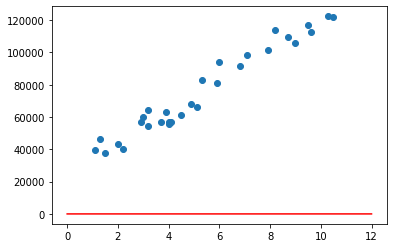

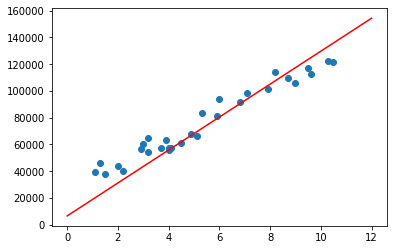

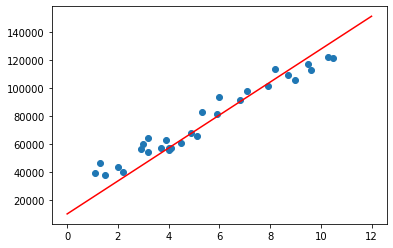

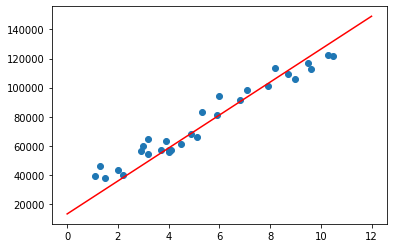

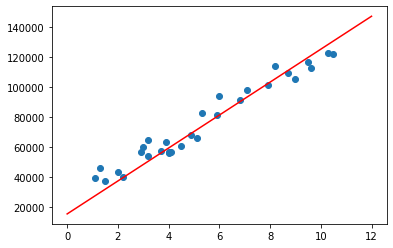

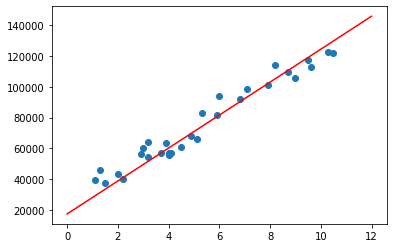

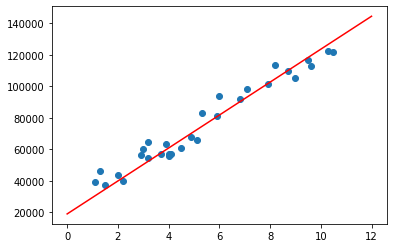

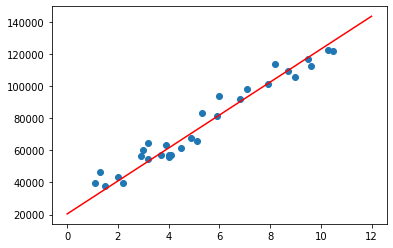

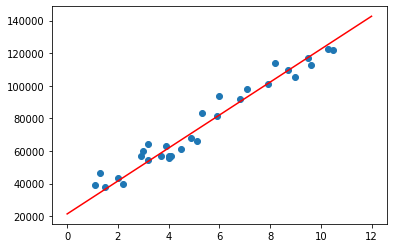

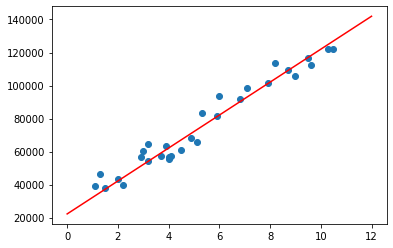

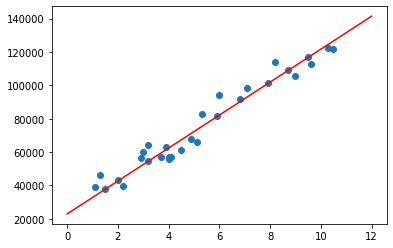

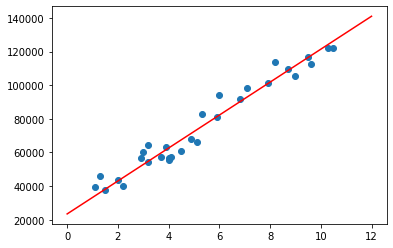

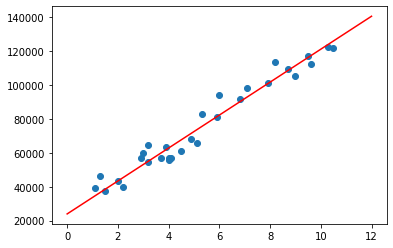

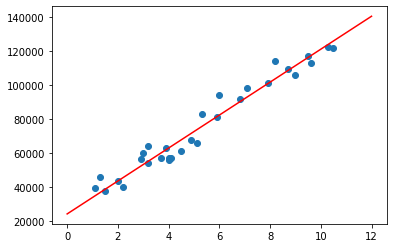

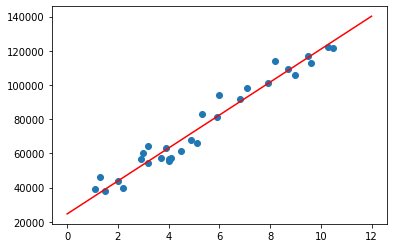

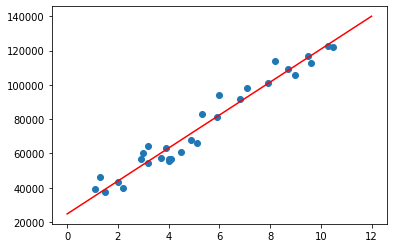

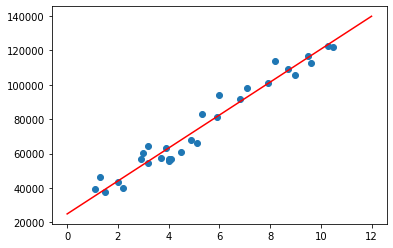

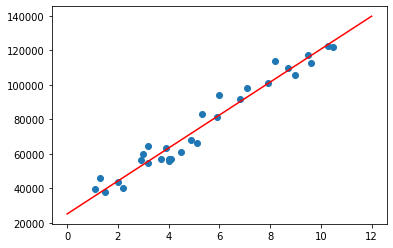

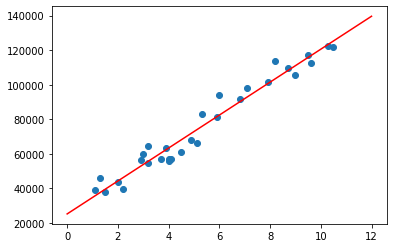

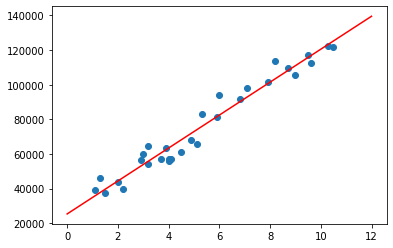

In [33]:
# Fit ข้อมูลเข้ากับสมการเส้นตรง
my_m, my_c = LinearRegression(Year_list, Salary_list, linspace=[0,12],n_data=len(df),epoch=2000, alpha=0.01)

In [34]:
print(my_m, my_c)

9501.242685146373 25446.635438391746


### ทดลองทำนายเงินเดือนจากจำนวนปีที่ทำงาน

In [35]:
# สุ่มหยิบข้อมูลจาก X_list

my_index = random.randint(0,len(Year_list)-1)
my_x_rand = Year_list[my_index]

# ใช้สมการเส้นตรงที่เราสร้างขึ้นมาทำนายผลค่า Y

my_pred = hypothesis(my_c, my_m, my_x_rand)

print("my_x_rand :",my_x_rand,"my_pred :",my_pred," Salary_real :", Salary_list[my_index])

my_x_rand : 9.6 my_pred : 116658.56521579693  Salary_real : 112635.0


## Multivariate Linear Regression

หลังจากที่เราเข้าใจ Simple Linear Regression แล้วในหัวข้อถัดมาเราจะลองทำ Multivariate Linear Regression ซึ่งมีความซับซ้อนกว่า Simple Linear Regression เนื่องจากข้อมูลรับเข้า (input) อาจมีได้มากกว่า 1 feature แต่ยังคงใช้หลักการเดิมในการสร้างสมการเส้นตรง

จาก Simple Linear Regression เราใช้ y = (m*x) + c

พอเป็น Multivariate Linear Regression เราจะใช้ y = (m1*x1) + (m2*x2) + (m3*x3) + ....(mn*xn) + c

จะเห็นได้ว่าจากเดิมที่เราเคยต้องปรับค่า m และ c (สำหรับ 1 input) ถ้ามีเรา (n input)ก็ต้องปรับค่าทั้งหมด (n+1) ค่า

In [36]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [37]:
# ข้อมูล boston_dataset เก็บด้วย dict หากเราต้องการทราบว่า dataset นี้มีการเก็บข้อมูลอย่างไร
# สามารถทำได้โดยการแสดงค่า key ของ dict นั้น

# data => ข้อมูล feature
# target => ราคาบ้าน
# feature_names => ชื่อ features
# รายละเอียดของ feature_name 
# filename => ชื่อไฟล์

print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


### รายระเอียดของแต่ละ feature

**CRIM**: Per capita crime rate by town

**ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft

**INDUS**: Proportion of non-retail business acres per town

**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**: Nitric oxide concentration (parts per 10 million)

**RM**: Average number of rooms per dwelling

**AGE**: Proportion of owner-occupied units built prior to 1940

**DIS**: Weighted distances to five Boston employment centers

**RAD**: Index of accessibility to radial highways

**TAX**: Full-value property tax rate per $10,000

**PTRATIO**: Pupil-teacher ratio by town

**B**: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

**LSTAT**: Percentage of lower status of the population

**MEDV**: Median value of owner-occupied homes in $1000s

In [38]:
print(boston_dataset.filename)

boston_house_prices.csv


In [39]:
print(boston_dataset.data.shape)

(506, 13)


จะเห็นได้ว่ามีข้อมูลทั้งหมด 506 rows และ 13 columns

In [40]:
print(boston_dataset.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [41]:
bos = pd.DataFrame(boston_dataset.data)
bos.columns = boston_dataset.feature_names
bos['PRICE'] = boston_dataset.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [43]:
# ข้อมูลที่เราจะใช้ train คือข้อมูล feature และเราจะทำนายผล PRICE 
# ดังนั้น เราจึงเก็บ feature ไว้ใน X และ ข้อมูลราคาบ้านไว้ใน Y

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

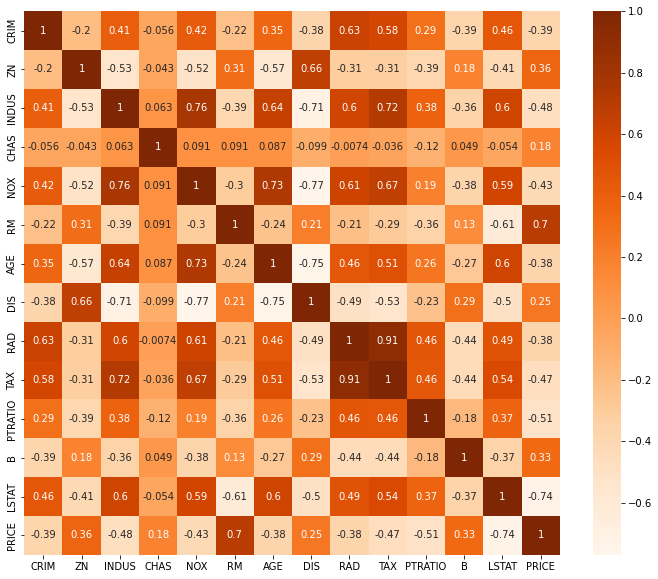

In [44]:
# Using Pearson Correlation

plt.figure(figsize=(12,10))
cor = bos.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Oranges)
plt.show()

การวิเคราะห์ correlation จะช่วยให้ทราบได้ว่า features ใดมีความสำคัญหรือส่งผลต่อค่า PRICE ของเราได้มากที่สุด

ในที่นี่เราเลือก feature ที่มี correlation มากกว่า 0.5 ขึ้นไป

In [45]:
#Correlation with output variable

cor_target = abs(cor["PRICE"])

#Selecting highly correlated features

relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

features => RM, PTRATIO, และ LSTAT เป็น feature ที่มี correlation ต่อ PRICE มากที่สุด

ดังนั้นเราจะเลือก 3 features นี้มาใช้ในการทำนายผล

In [46]:
# สร้าง list ว่างของ X_list เพื่อเก็บค่า x และ Y_list เพื่อเก็บค่า y
X_bos = []
Y_bos = []

for i in range(len(X)):
  X_bos.append( ( X['RM'][i] , X['PTRATIO'][i] , X['LSTAT'][i] ) )
  Y_bos.append( Y[i] )

In [47]:
X_bos[0]

(6.575, 15.3, 4.98)

เนื่องจากข้อมูลมีหลาย features ทำให้ไม่สามารถแสดงผลในแกน X-Y ได้

ดังนั้นเราจะใช้วิธีแบ่งข้อมูลออกเป็น train-set เพื่อนำมาใช้ในการ fit กับ model 

และ test-set เพื่อใช้ทดสอบความแม่นยำของโมเดลว่าสามารถทำนายผลได้ตรงตามต้องการหรือไม่

In [48]:
# แบ่งข้อมูล train-set และ test-set
from sklearn.model_selection import train_test_split

X_bos_train, X_bos_test, Y_bos_train, Y_bos_test = train_test_split(X_bos, Y_bos, test_size=0.1, random_state=42)

X_bos_train, X_bos_val, Y_bos_train, Y_bos_val = train_test_split(X_bos_train, Y_bos_train, test_size=0.25, random_state=42)

print("X_bos_train shape :",len(X_bos_train))
print("X_bos_val shape :",len(X_bos_val))
print("X_bos_test shape :",len(X_bos_test))

X_bos_train shape : 341
X_bos_val shape : 114
X_bos_test shape : 51


In [53]:
# TODO:6 จงสร้างฟังก์ชันที่คืนค่า y ของ hypothesis function สำหรับ boston house

def bos_hypothesis(theta0, theta1, theta2, theta3, x1, x2, x3):
  ### CODE HERE ###########################################
  
	return theta3*x3 + theta2*x2 + theta1*x1 + theta0

  #########################################################

In [54]:
### Test code for TODO:6 ###

ttd6 = bos_hypothesis(3.125,-1.643,0.176,12.346,10.423,-25.646,3.947)
print(ttd6)

######################################
### ผลลัพธ์ที่ได้ควรจะเป็น 30.215977 #######
######################################


30.215976999999995


ในกรณีของ loss function เราสามารถที่จะใช้ฟังก์ชั่นเดิมได้เนื่องจากโมเดลของเราทำนายค่าออกมา 1 ค่าเหมือนตัวอย่างก่อน

In [80]:
# TODO:7 จงเติมฟังก์ชัน bos_derivatives ให้สมบูรณ์

def bos_derivatives(theta0, theta1, theta2, theta3, X_bos, Y_bos):
  dtheta0 = 0
  dtheta1 = 0
  dtheta2 = 0
  dtheta3 = 0
  
  ### CODE HERE #########################################
  
  for (xi, yi) in zip(X_bos, Y_bos):
    dtheta0 += bos_hypothesis(theta0, theta1, theta2, theta3, xi[0], xi[1], xi[2]) - yi
    dtheta1 += (bos_hypothesis(theta0, theta1, theta2, theta3, xi[0], xi[1], xi[2]) - yi) * xi[0]
    dtheta2 += (bos_hypothesis(theta0, theta1, theta2, theta3, xi[0], xi[1], xi[2]) - yi) * xi[1]
    dtheta3 += (bos_hypothesis(theta0, theta1, theta2, theta3, xi[0], xi[1], xi[2]) - yi) * xi[2]
    
  
  dtheta0 /= len(X_bos)
  dtheta1 /= len(X_bos)
  dtheta2 /= len(X_bos)
  dtheta3 /= len(X_bos)

  #######################################################
  
  return dtheta0, dtheta1, dtheta2, dtheta3

In [81]:
# TODO:8 จงเติมฟังก์ชัน bos_updateParameters ให้สมบูรณ์

def bos_updateParameters(theta0, theta1, theta2, theta3, X_bos, Y_bos, alpha):
  
  ### CODE HERE ################################################
  
  # Step1: คำนวนค่า derivartive ของ theta0, theta1, theta2, และ theta3
  dtheta0, dtheta1, dtheta2, dtheta3 = bos_derivatives(theta0, theta1, theta2, theta3, X_bos, Y_bos)
  # Step2: ปรับค่า theta0, theta1, theta2, theta3 ไปตามค่า alpha และค่า gradient 
  
  theta0 -= alpha*dtheta0
  theta1 -= alpha*dtheta1
  theta2 -= alpha*dtheta2
  theta3 -= alpha*dtheta3  
  
  ##############################################################
  
  return theta0, theta1, theta2, theta3

In [89]:
# TODO:9 จงเติมฟังก์ชัน bos_LinearRegression ให้สมบูรณ์

def bos_LinearRegression(X_bos_train, Y_bos_train, X_bos_val, Y_bos_val, epoch, alpha=0.0002):
  
  # Step1: กำหนดค่าเริ่มต้นให้กับ theta0, theta1, theta2, และ theta3 แบบสุ่ม (ใช้ฟังก์ชัน random)
  theta0 = np.random.rand()
  theta1 = np.random.rand()
  theta2 = np.random.rand()
  theta3 = np.random.rand()

  ### CODE HERE ###########################################################################################################
  
  # Step2: วนลูปเพื่อใช้ในการปรับ weight ให้กับ model
  # For loop ตามจำนวน epoch 
  for i in range(0, epoch):
    y_pred_train = []
    
    # For loop ใน training data
    for j in range(len(X_bos_train)):

      # Step3: ในทุกๆ step ให้แสดงผลค่า loss ของข้อมูล train และ 100 step ให้แสดงผลค่า loss ของข้อมูล test
      y_pred = bos_hypothesis(theta0, theta1, theta2, theta3, X_bos_train[j][0], X_bos_train[j][1], X_bos_train[j][2])
      y_pred_train.append(y_pred)
  
# Step4: ปรับ weight ให้กับค่า theta3 theta2 theta1 และ theta0  
      # เติมตรงนี้ การปรับค่า weight ควรจะปรับใน loop ไหนดี #
    theta0, theta1, theta2, theta3 = bos_updateParameters(theta0, theta1, theta2, theta3, X_bos_train, Y_bos_train, alpha)
  
    # Step5: แสดงผลค่า loss
    loss_train = cal_MSE(Y_bos_train, y_pred_train)
      
    print("Training loss :",loss_train)
    
    if i % 100 == 0:
      y_pred_val = []
      
      for k in range(len(X_bos_val)):
        y_pred = bos_hypothesis(theta0, theta1, theta2, theta3, X_bos_val[k][0], X_bos_val[k][1], X_bos_val[k][2])
        y_pred_val.append(y_pred)
      
      # Step6: คำนวนค่า loss
      # เติมตรงนี้ #
      loss_val = cal_MSE(Y_bos_val, y_pred_val)

      print("Validation loss :",loss_val)
  #########################################################################################################################

  return theta0, theta1, theta2, theta3

In [95]:
bos_theta0, bos_theta1, bos_theta2, bos_theta3 = bos_LinearRegression(X_bos_train, Y_bos_train, X_bos_val, Y_bos_val, epoch=300, alpha=0.001)

Training loss : 129.42988073569921
Validation loss : 108.37660721654382
Training loss : 122.85707153644589
Training loss : 118.82472627189772
Training loss : 115.44691296121007
Training loss : 112.35517479631747
Training loss : 109.46937479427864
Training loss : 106.76467907887321
Training loss : 104.2273495506423
Training loss : 101.84632584634808
Training loss : 99.61159322928337
Training loss : 97.51383900118763
Training loss : 95.5443553173683
Training loss : 93.69499074489386
Training loss : 91.95811296984341
Training loss : 90.3265754065357
Training loss : 88.79368622131389
Training loss : 87.35317938237425
Training loss : 85.99918756220252
Training loss : 84.72621676628985
Training loss : 83.52912257668169
Training loss : 82.40308790729993
Training loss : 81.34360217478046
Training loss : 80.34644179474172
Training loss : 79.40765191914092
Training loss : 78.52352933574323
Training loss : 77.69060645575333
Training loss : 76.90563632036789
Training loss : 76.16557856141051
Train

ทีนี้ลองมานำโมเดลมาใช้ทำนายผลกับ test data ดูสิว่ามีแม่นยำหรือไม่

In [91]:
# สุ่มหยิบข้อมูลจาก X_list

bos_index = random.randint(0,len(X_bos_test)-1)
bos_x_rand = X_bos_test[bos_index]

# ใช้สมการเส้นตรงที่เราสร้างขึ้นมาทำนายผลค่า Y
bos_pred = bos_hypothesis(bos_theta0, bos_theta1, bos_theta2, bos_theta3, bos_x_rand[0], bos_x_rand[1], bos_x_rand[2])

print("bos_x_rand :",bos_x_rand,"bos_pred :",bos_pred," bos_real :", Y_bos_test[bos_index])

bos_x_rand : (6.006, 20.2, 15.7) bos_pred : 20.52835528207752  bos_real : 14.2


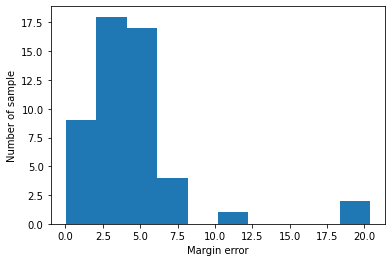

In [96]:
# สร้าง list ขึ้นมาเพื่อเก็บผลการทำนายในการนำไปใช้ในการเปรียบเทียบผลการทำนายและค่าจริิงของผลลัพธ์
bos_pred_plot = []

for i in range(len(X_bos_test)):
  bos_pred = bos_hypothesis(bos_theta0, bos_theta1, bos_theta2, bos_theta3, X_bos_test[i][0], X_bos_test[i][1], X_bos_test[i][2])
  bos_pred_plot.append(abs(bos_pred-Y_bos_test[i]))

counts, bins = np.histogram(bos_pred_plot)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('Margin error')
plt.ylabel('Number of sample')
plt.show()